In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/train_df.csv')

In [4]:
df_train.shape

(316566, 16)

In [5]:
df_test = pd.read_csv('/content/drive/MyDrive/test_df.csv')

In [6]:
df_test.shape

(105522, 16)

In [7]:
df = df_train.append(df_test, ignore_index=True)
X = df.drop(['target'],axis=1)
y = df.iloc[:,-1]

In [8]:
df.shape

(422088, 16)

In [9]:
X_train = df_train.drop(['target'],axis=1)
X_test = df_test.drop(['target'],axis=1)

In [10]:
y_train = df_train.target
y_test = df_test.target

####k-means

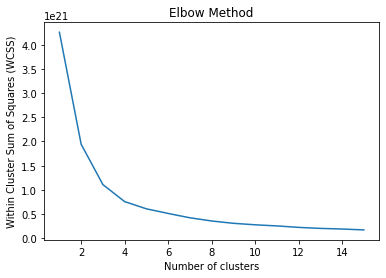

In [11]:
#elbow method indicates that we should set the number of clusters equal to five
wcss = []

for i in range(1, 16):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 1000,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 5,max_iter = 1000,n_init = 10,random_state = 0)

In [17]:
label_kmeans = kmeans.fit_predict(X)

####t-SNE

In [ ]:
from sklearn.manifold import TSNE


# tsne
tsne = TSNE(n_components=2, verbose=3, perplexity=10,n_iter=5000, learning_rate=200,random_state=0,n_jobs=-1)
X_embedded = tsne.fit_transform(X.iloc[:,:])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 422088 samples in 1.560s...
[t-SNE] Computed neighbors for 422088 samples in 1482.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 422088
[t-SNE] Computed conditional probabilities for sample 2000 / 422088
[t-SNE] Computed conditional probabilities for sample 3000 / 422088
[t-SNE] Computed conditional probabilities for sample 4000 / 422088
[t-SNE] Computed conditional probabilities for sample 5000 / 422088
[t-SNE] Computed conditional probabilities for sample 6000 / 422088
[t-SNE] Computed conditional probabilities for sample 7000 / 422088
[t-SNE] Computed conditional probabilities for sample 8000 / 422088
[t-SNE] Computed conditional probabilities for sample 9000 / 422088
[t-SNE] Computed conditional probabilities for sample 10000 / 422088
[t-SNE] Computed conditional probabilities for sample 11000 / 422088
[t-SNE] Computed conditional probabilities for sample 12000 / 422088
[t-SNE] Computed conditional prob

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


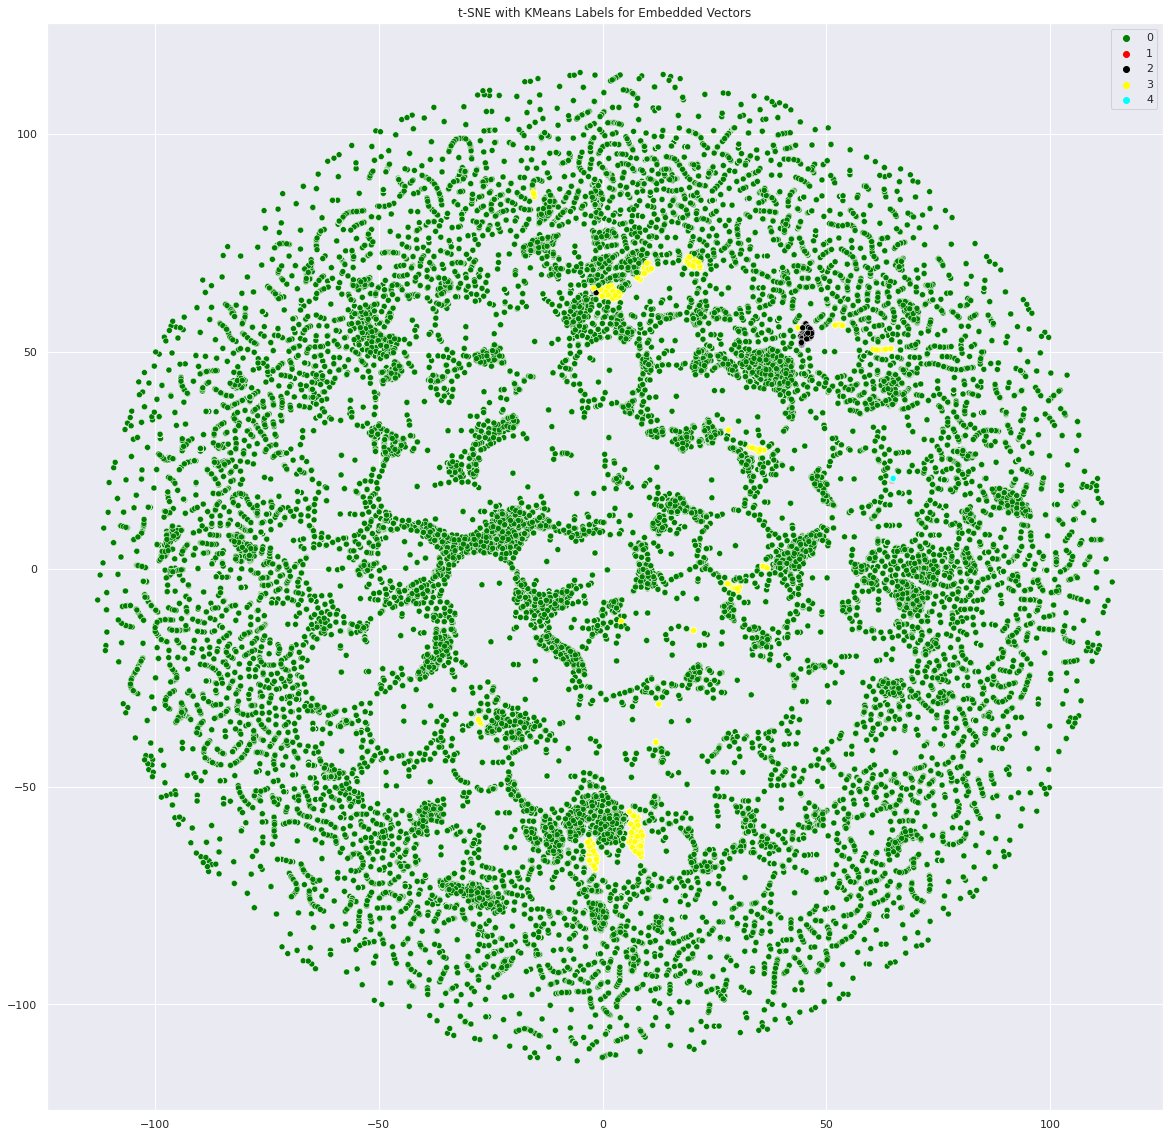

In [ ]:
#t-SNE fails to depict each cluster separate from the others
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=label_kmeans[:],
                legend='full',palette=["Green","red", "Black","Yellow","Cyan"])


plt.title('t-SNE with KMeans Labels for Embedded Vectors')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


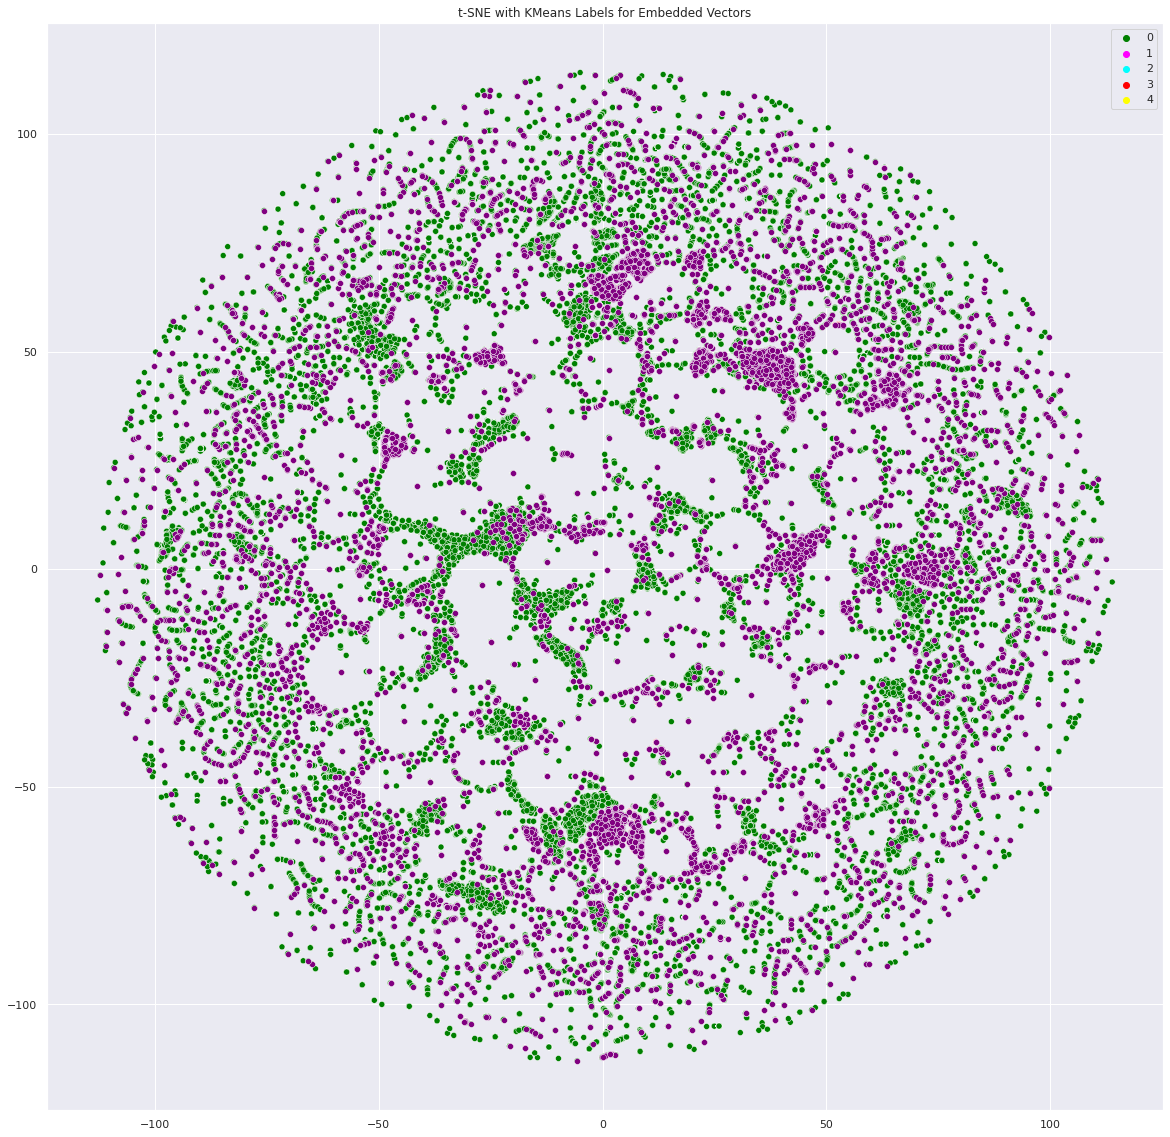

In [ ]:
# the purple points are actual start-ups and they are spread all over the place too
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=label_kmeans[:],
                legend='full',palette=["Green","magenta", "cyan","red","yellow"])

sns.scatterplot((X_embedded[:,0][i] for i in range(len(y)) if y[i]==1),(X_embedded[:,1][i] for i in range(len(y)) if y[i]==1),
                legend='full',color=["Purple"])

plt.title('t-SNE with KMeans Labels for Embedded Vectors')
plt.show()

####PCA

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,svd_solver='randomized',random_state=0)
X_pca = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


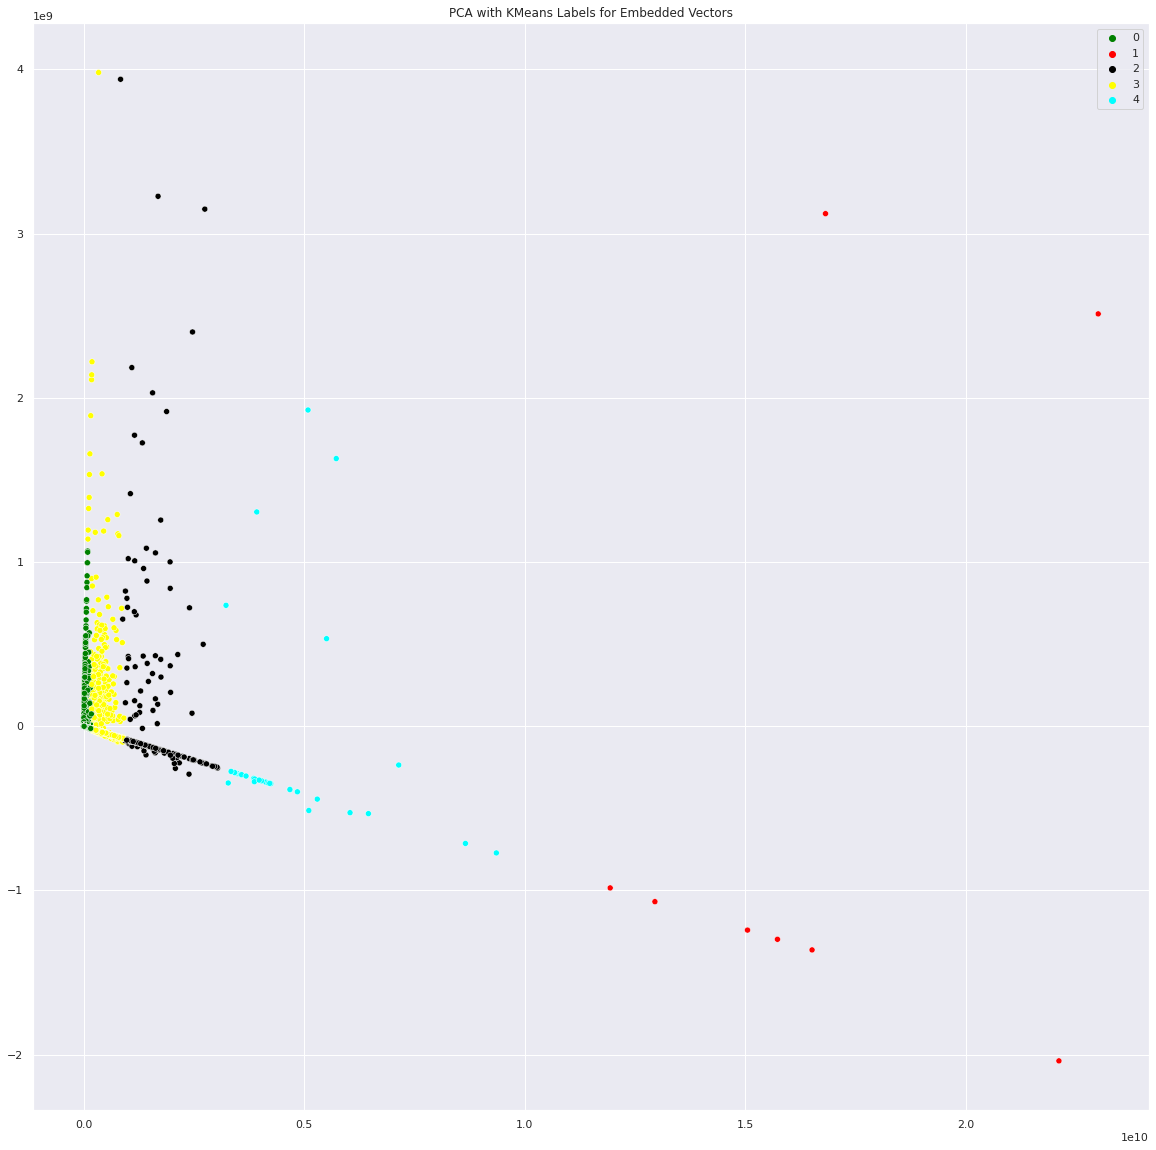

In [18]:
#PCA succeeds in revealing clusters produced by k-means
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=label_kmeans[:],
                legend='full',palette=["Green","Red", "Black","Yellow","Cyan"])

#sns.scatterplot((X_pca[:,0][i] for i in range(len(y)) if y[i]==1),(X_pca[:,1][i] for i in range(len(y)) if y[i]==1),
#                legend='full',color=["Purple"])

plt.title('PCA with KMeans Labels for Embedded Vectors')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


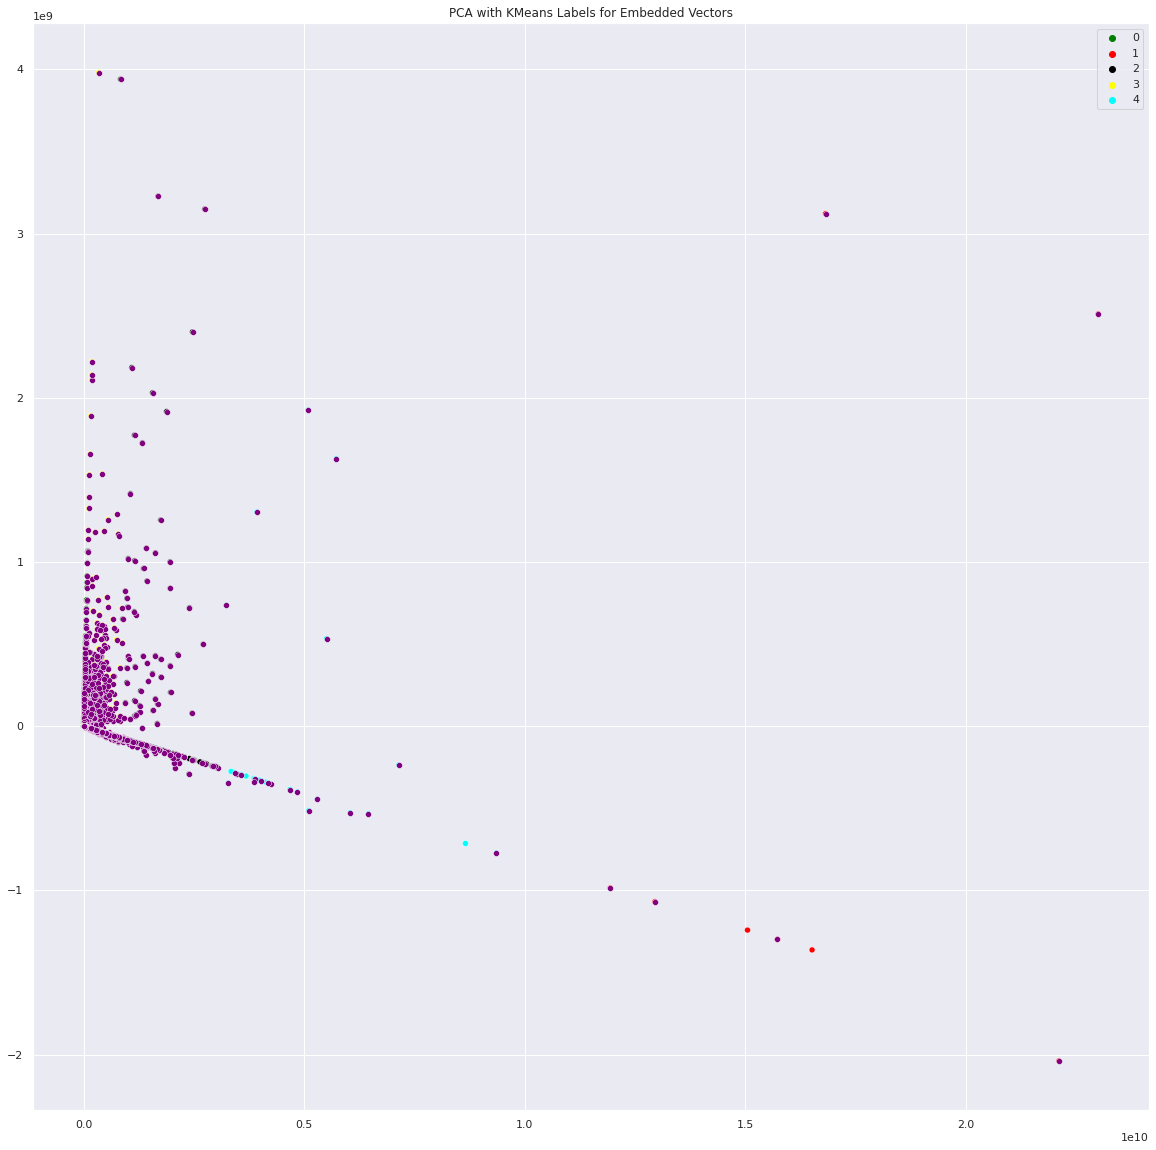

In [19]:
#it is clear that actual start-ups are not locked in one specific cluster and pure k-means is not enough for classification
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=label_kmeans[:],
                legend='full',palette=["Green","Red", "Black","Yellow","Cyan"])

sns.scatterplot((X_pca[:,0][i] for i in range(len(y)) if y[i]==1),(X_pca[:,1][i] for i in range(len(y)) if y[i]==1),
                legend='full',color=["Purple"])

plt.title('PCA with KMeans Labels for Embedded Vectors')
plt.show()